<a href="https://colab.research.google.com/github/GarimaDewangan/Shala2020/blob/main/ML_asgn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About the dataset:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


The column named Survived is the label and the remaining columns are features. \
The features can be described as given below: \
Variable	Definition \
pclass:	Ticket class \
SibSp:	Number of siblings / spouses aboard the Titanic \
Parch:	Number of parents / children aboard the Titanic \
Ticket:	Ticket number \
Embarked:	Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton \

#Pre - Processing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
db = pd.read_csv('titanic.csv')

In [ ]:
display(db)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
db.shape

(891, 12)

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
db.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

##Cleaning

In [ ]:
for i in db.columns:
  print('{:<12}'.format(i), '{:<8}'.format(len(db[i].unique())))

PassengerId  891     
Survived     2       
Pclass       3       
Name         891     
Sex          2       
Age          89      
SibSp        7       
Parch        7       
Ticket       681     
Fare         248     
Cabin        148     
Embarked     4       


In [ ]:
for i in db.columns:
  print('{:<12}'.format(i), '{:<8}'.format(db[i].isna().sum()))

PassengerId  0       
Survived     0       
Pclass       0       
Name         0       
Sex          0       
Age          177     
SibSp        0       
Parch        0       
Ticket       0       
Fare         0       
Cabin        687     
Embarked     2       


In [ ]:
db['Age'].fillna(value= db['Age'].mean(), inplace=True)

In [ ]:
db.drop(labels = ['PassengerId', 'Name'], axis=1, inplace=True)

In [ ]:
cabin = db['Cabin']
db.drop(labels = ['Cabin'], axis = 1, inplace = True)

In [ ]:
ticket = db['Ticket']
db.drop(labels = ['Ticket'], axis = 1, inplace = True)

In [ ]:
db['Sex'] = db['Sex'].map({'male' : 0, 'female': 1}).astype(int)

In [ ]:
db = pd.get_dummies(db)

In [ ]:
db.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [ ]:
db.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


##Visualzation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f475971e290>,
      dtype=object)

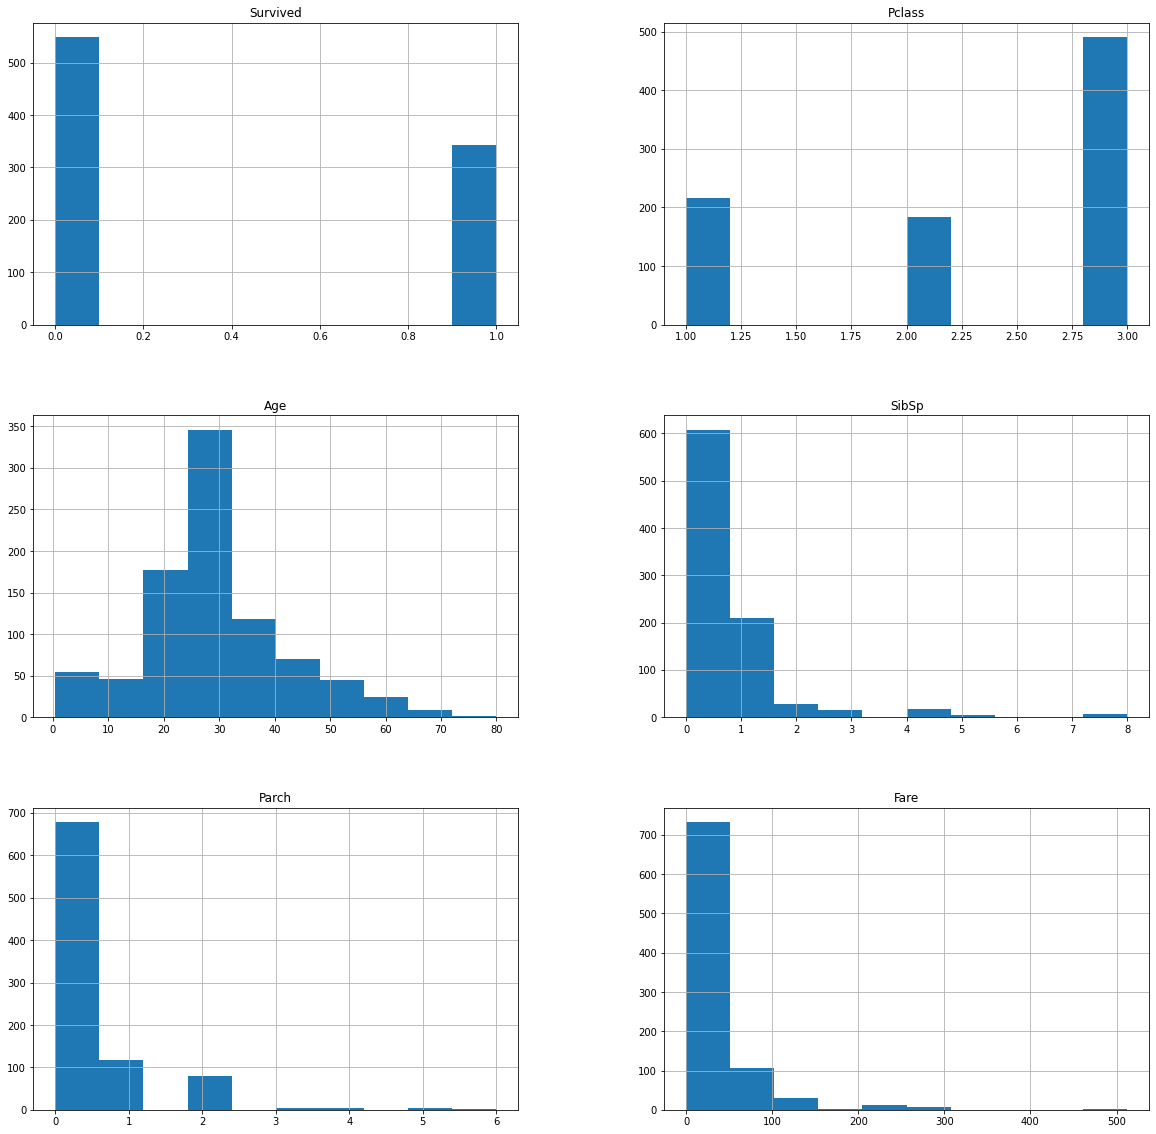

In [ ]:
db.hist(figsize = (20,20))

##Split

In [ ]:
x = db.drop(labels=['Survived'], axis =1)
y = db['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score,mean_squared_error

In [ ]:
x_t, x_test, y_t, y_test = train_test_split(x, y, test_size = 0.2, random_state=123)
x_train, x_val, y_train, y_val = train_test_split(x_t, y_t, test_size = 0.2, random_state=123)

#Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [ ]:
dt = DTC()
dt.fit(x_t,y_t)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred = dt.predict(x_t)
acc = accuracy_score(y_t,pred)
print(acc)

0.9817415730337079


In [ ]:
pred = dt.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc)

0.8156424581005587


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       114
           1       0.74      0.77      0.75        65

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.82      0.82       179



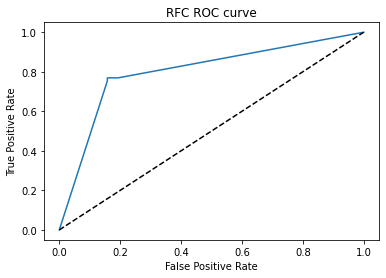

In [ ]:
from sklearn.metrics import roc_curve  
probs = dt.predict_proba(x_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RFC ROC curve')
# show the plot
plt.show()

#Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
abc = AdaBoostClassifier()
abc.fit(x_t, y_t)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
pred = abc.predict(x_t)
acc = accuracy_score(y_t,pred)
print(acc)

0.8300561797752809


In [ ]:
pred = abc.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc)

0.8324022346368715


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       114
           1       0.75      0.80      0.78        65

    accuracy                           0.83       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.84      0.83      0.83       179



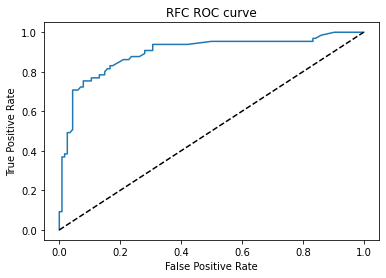

In [ ]:
from sklearn.metrics import roc_curve  
probs = abc.predict_proba(x_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RFC ROC curve')
# show the plot
plt.show()

#XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb

In [ ]:
xc = XGBClassifier()
xc.fit(x_t, y_t)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pred = xc.predict(x_t)
acc = accuracy_score(y_t,pred)
print(acc)

0.8707865168539326


In [ ]:
pred = xc.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc)

0.8491620111731844


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       114
           1       0.81      0.77      0.79        65

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



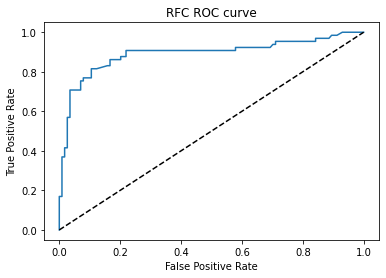

In [ ]:
from sklearn.metrics import roc_curve  
probs = xc.predict_proba(x_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RFC ROC curve')
# show the plot
plt.show()

#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_t, y_t)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred = rfc.predict(x_t)
acc = accuracy_score(y_t,pred)
print(acc)

0.9817415730337079


In [ ]:
pred = rfc.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc)

0.8379888268156425


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       114
           1       0.76      0.80      0.78        65

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



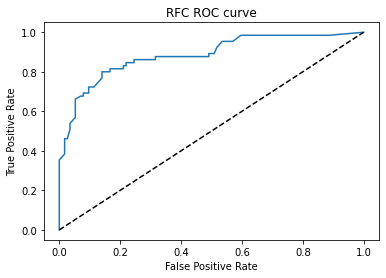

In [ ]:
from sklearn.metrics import roc_curve  
probs = rfc.predict_proba(x_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RFC ROC curve')
# show the plot
plt.show()